In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense, Input

In [2]:
# Load the California Housing dataset
california_housing = fetch_california_housing()

# Create a DataFrame for the features
cal_hous_features= pd.DataFrame(california_housing.data, columns=california_housing.feature_names)
print("California Housing Features:")
display(cal_hous_features.head())


cal_hous_target=pd.DataFrame(california_housing.target,columns=['MedHouseVal'])
print("\nCalifornia Housing Target:")
display(cal_hous_target.head())

California Housing Features:


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25



California Housing Target:


,MedHouseVal
0,4.526
1,3.585
2,3.521
3,3.413
4,3.422


In [3]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(cal_hous_features, cal_hous_target, test_size=0.2, random_state=42)

In [4]:
# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [5]:
# Create the MLP model using Keras
model = Sequential()
model.add(Input(shape=(X_train.shape[1],)))  # Input layer to define input shape
model.add(Dense(10, activation='relu'))  # Hidden layer
model.add(Dense(10, activation='relu'))  # Hidden layer
model.add(Dense(1, activation='linear'))  # Output layer for regression

# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_error'])

In [6]:
# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=64, verbose=1)

Epoch 1/100
258/258 [==============================] - 1s 726us/step - loss: 3.3999 - mean_absolute_error: 1.4085
Epoch 2/100
258/258 [==============================] - 0s 738us/step - loss: 0.8441 - mean_absolute_error: 0.6842
Epoch 3/100
258/258 [==============================] - 0s 675us/step - loss: 0.7116 - mean_absolute_error: 0.6197
Epoch 4/100
258/258 [==============================] - 0s 709us/step - loss: 0.6198 - mean_absolute_error: 0.5757
Epoch 5/100
258/258 [==============================] - 0s 642us/step - loss: 0.5436 - mean_absolute_error: 0.5363
Epoch 6/100
258/258 [==============================] - 0s 659us/step - loss: 0.4838 - mean_absolute_error: 0.5025
Epoch 7/100
258/258 [==============================] - 0s 626us/step - loss: 0.4454 - mean_absolute_error: 0.4802
Epoch 8/100
258/258 [==============================] - 0s 680us/step - loss: 0.4280 - mean_absolute_error: 0.4683
Epoch 9/100
258/258 [==============================] - 0s 658us/step - loss: 0.4217 - me

258/258 [==============================] - 1s 3ms/step - loss: 0.2877 - mean_absolute_error: 0.3675
Epoch 74/100
258/258 [==============================] - 1s 3ms/step - loss: 0.2880 - mean_absolute_error: 0.3674
Epoch 75/100
258/258 [==============================] - 0s 1ms/step - loss: 0.2900 - mean_absolute_error: 0.3686
Epoch 76/100
258/258 [==============================] - 0s 2ms/step - loss: 0.2881 - mean_absolute_error: 0.3670
Epoch 77/100
258/258 [==============================] - 0s 1ms/step - loss: 0.2876 - mean_absolute_error: 0.3670
Epoch 78/100
258/258 [==============================] - 0s 1ms/step - loss: 0.2872 - mean_absolute_error: 0.3668
Epoch 79/100
258/258 [==============================] - 0s 1ms/step - loss: 0.2862 - mean_absolute_error: 0.3652
Epoch 80/100
258/258 [==============================] - 0s 1ms/step - loss: 0.2864 - mean_absolute_error: 0.3658
Epoch 81/100
258/258 [==============================] - 1s 2ms/step - loss: 0.2864 - mean_absolute_error: 0.3

In [7]:
# Make predictions on the test set
y_test_pred = model.predict(X_test) 

129/129 [==============================] - 0s 2ms/step


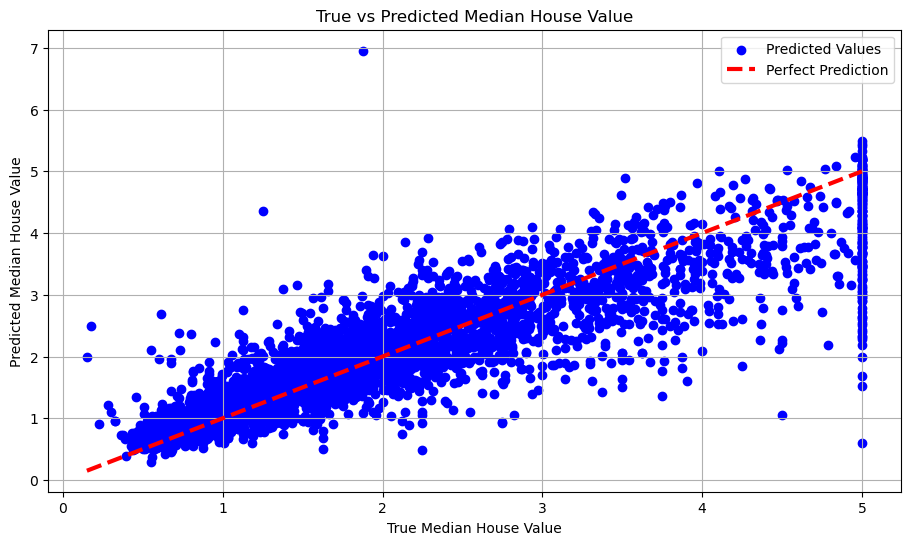

In [16]:
# Plotting True vs Predicted Values
plt.figure(figsize=(11, 6))
plt.scatter(y_test, y_test_pred, color='blue', label='Predicted Values')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', linewidth=3, label='Perfect Prediction')  # Reference line
plt.title('True vs Predicted Median House Value')
plt.xlabel('True Median House Value')
plt.ylabel('Predicted Median House Value')
plt.legend()
plt.grid()
plt.show()